In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

In [ ]:
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

In [ ]:
y_train_binary = (y_train % 2 != 0).astype("int")
y_test_binary = (y_test % 2 != 0).astype("int")

In [ ]:
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # binary output
])


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
history = model.fit(x_train, y_train_binary, epochs=5, batch_size=128,
                    validation_data=(x_test, y_test_binary))

Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 47s 95ms/step - accuracy: 0.9013 - loss: 0.2254 - val_accuracy: 0.9844 - val_loss: 0.0433
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 43s 91ms/step - accuracy: 0.9834 - loss: 0.0474 - val_accuracy: 0.9892 - val_loss: 0.0335
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 82s 90ms/step - accuracy: 0.9886 - loss: 0.0332 - val_accuracy: 0.9875 - val_loss: 0.0401
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 83s 93ms/step - accuracy: 0.9919 - loss: 0.0245 - val_accuracy: 0.9921 - val_loss: 0.0243
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 43s 91ms/step - accuracy: 0.9934 - loss: 0.0194 - val_accuracy: 0.9925 - val_loss: 0.0239


In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test_binary, verbose=0)
print(f"\n✅ Test Accuracy: {test_acc*100:.2f}%")


✅ Test Accuracy: 99.25%


In [ ]:
y_pred_probs = model.predict(x_test)
y_pred = (y_pred_probs > 0.5).astype("int")

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step


In [ ]:
num_samples = 10
indices = np.random.choice(len(x_test), num_samples, replace=False)

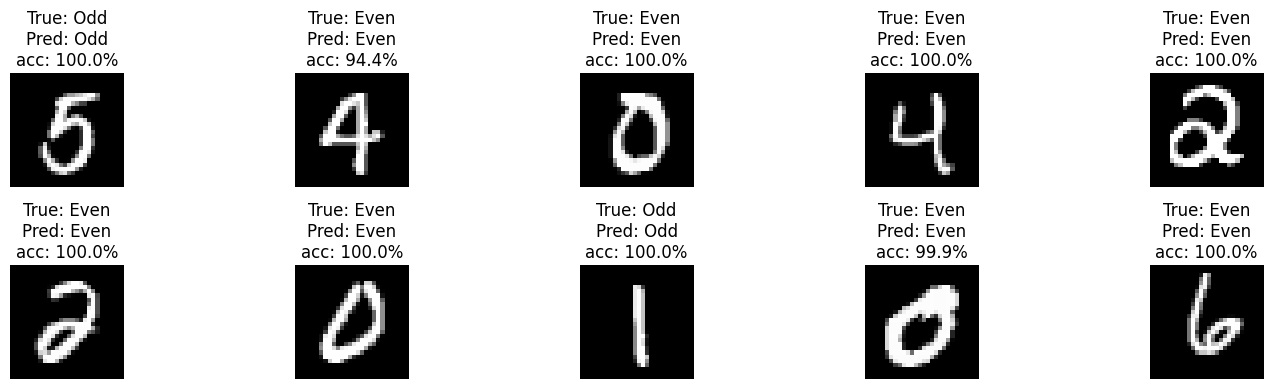

In [ ]:
plt.figure(figsize=(15, 4))
for i, idx in enumerate(indices):
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_test[idx].reshape(28, 28), cmap='gray')

    true_label = "Odd" if y_test_binary[idx] else "Even"
    pred_label = "Odd" if y_pred[idx] else "Even"

    predicted_class = y_pred[idx][0]
    prob_odd = y_pred_probs[idx][0]
    confidence = prob_odd if predicted_class == 1 else 1 - prob_odd
    if predicted_class == y_test_binary[idx]:
        acc_display = confidence * 100
    else:
        acc_display = (1 - confidence) * 100

    plt.title(f"True: {true_label}\nPred: {pred_label}\nacc: {acc_display:.1f}%")
    plt.axis('off')

plt.tight_layout()
plt.show()
